In [35]:
#Install OpenCV

!apt-get update
!apt-get install -y libopencv-dev python3-opencv

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

Saving parrot.jpg to parrot (1).jpg


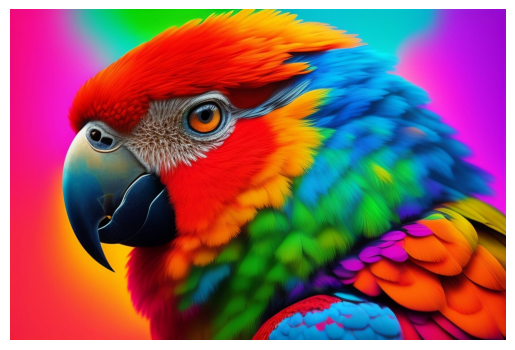

In [21]:
from PIL import Image
pic = Image.open('parrot.jpg')

plt.imshow(pic)
plt.axis('off')  #Turn off axis numbers and ticks
plt.show()

In [33]:
%%writefile prog.cpp

#include <stdio.h>
#include <opencv2/opencv.hpp> //opencv header
#include <chrono> // for timing

using namespace cv;  // opencv namespace
using namespace std::chrono; //for timing


// function to convert RGB to grayscale (cpu version)

void rgb_to_greyscale_cpu(unsigned char *input, unsigned char *output, int width, int height)
{
   for (int y=0; y<height; y++){
    for (int x = 0; x<width; x++)
    {
      int idx = (y*width + x)*3; // 3 channel (B, G, R)

      unsigned char r = input[idx + 2];    // Red channel
      unsigned char g = input[idx + 1];    // Green channel
      unsigned char b = input[idx];        // Blue channel

      //Apply the formula: L = 0.21*R + 0.72*G + 0.07*b
      unsigned char L = (unsigned char)(0.21f*r + 0.72f*g + 0.07f*b);
      output[y*width+x] = L;

    }
   }

}


int main()
{
   // Load the image using OpenCV
   Mat img = imread("parrot.jpg", IMREAD_COLOR);   // Read image as BGR
   if (img.empty()){
    printf("Error: Could not open or find the image. \n");
    return -1;
   }

   int width = img.cols;
   int height = img.rows;
   int img_size = width * height *3;        // For RGB (or BGR) image
   int grey_img_size = width*height;        // For grayscale image

   //Allocate memory for grayscale output

   unsigned char *h_output = (unsigned char*)malloc(grey_img_size); // Host output grayscale

   //Opencv stores data in BGR format by default

   unsigned char *h_input = img.data; // opencv Mat img data pointer (BGR)

   //Start timing
   auto start = high_resolution_clock::now();

   //perform RGB to grayscale conversion on cpu
   rgb_to_greyscale_cpu(h_input,h_output,width,height);

   // stop timing
   auto stop = high_resolution_clock::now();
   auto duration =duration_cast<nanoseconds>(stop-start);

   printf("Time for grayscale conversion (cpu):%ld ns\n", duration.count());

   //save the grayscale image using OpenCV
   Mat grey_img(height, width, CV_8UC1, h_output);
   imwrite("greyscale-parrot.jpg", grey_img);

   //Free host memory
   free(h_output);

   return 0;

}

Overwriting prog.cpp


In [34]:
!g++ prog.cpp -o exe `pkg-config --cflags --libs opencv4`
!./exe

Time for grayscale conversion (cpu):20015245 ns
